In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_690.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1235.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_611.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_749.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1810.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1493.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1023.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_368.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_877.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_102.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1516.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_28.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_325.jpg
/kaggle/input/plant-pathology-

/kaggle/input/plant-pathology-2020-fgvc7/images/Test_250.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_802.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1329.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1225.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_126.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1288.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_585.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1623.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1436.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1339.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_641.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1354.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1224.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1610.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1421.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1399.jpg
/kaggle/in

/kaggle/input/plant-pathology-2020-fgvc7/images/Test_133.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_98.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_592.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_93.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1055.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_477.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_20.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_503.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1179.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1081.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1519.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1752.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1765.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_910.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_95.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1191.jpg
/kaggle/inp

In [2]:
!pip install -q efficientnet

In [3]:
import os
import gc
import re

import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
import efficientnet.tfkeras as efn
from keras.utils import plot_model
import tensorflow.keras.layers as L
from keras.utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.applications import DenseNet121

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [4]:
EPOCHS = 20
SAMPLE_LEN = 100
IMAGE_PATH = "../input/plant-pathology-2020-fgvc7/images/"
TEST_PATH = "../input/plant-pathology-2020-fgvc7/test.csv"
TRAIN_PATH = "../input/plant-pathology-2020-fgvc7/train.csv"
SUB_PATH = "../input/plant-pathology-2020-fgvc7/sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [5]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

train_images = train_data["image_id"][:SAMPLE_LEN].progress_apply(load_image)

100%|██████████| 100/100 [00:04<00:00, 22.22it/s]


In [34]:
fig = px.imshow(cv2.resize(train_images[0], (205, 136)))
fig.show()

In [ ]:
red_values = [np.mean(train_images[idx][:, :, 0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[idx][:, :, 1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[idx][:, :, 2]) for idx in range(len(train_images))]
values = [np.mean(train_images[idx]) for idx in range(len(train_images))]

In [ ]:
fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
# fig.data[0].marker.line.width = 0.5
fig

In [ ]:
fig = ff.create_distplot([red_values], group_labels=["R"], colors=["red"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of red channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [ ]:
fig = ff.create_distplot([green_values], group_labels=["G"], colors=["green"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of green channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [ ]:
fig = ff.create_distplot([blue_values], group_labels=["B"], colors=["blue"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of blue channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

In [ ]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))
    
fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel", template="plotly_white")

In [ ]:
fig = ff.create_distplot([red_values, green_values, blue_values],
                         group_labels=["R", "G", "B"],
                         colors=["red", "green", "blue"])
fig.update_layout(title_text="Distribution of red channel values", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
def visualize_leaves(cond=[0, 0, 0, 0], cond_cols=["healthy"], is_cond=True):
    if not is_cond:
        cols, rows = 3, min([3, len(train_images)//3])
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
        for col in range(cols):
            for row in range(rows):
                ax[row, col].imshow(train_images.loc[train_images.index[-row*3-col-1]])
        return None
        
    cond_0 = "healthy == {}".format(cond[0])
    cond_1 = "scab == {}".format(cond[1])
    cond_2 = "rust == {}".format(cond[2])
    cond_3 = "multiple_diseases == {}".format(cond[3])
    
    cond_list = []
    for col in cond_cols:
        if col == "healthy":
            cond_list.append(cond_0)
        if col == "scab":
            cond_list.append(cond_1)
        if col == "rust":
            cond_list.append(cond_2)
        if col == "multiple_diseases":
            cond_list.append(cond_3)
    
    data = train_data.loc[:100]
    for cond in cond_list:
        data = data.query(cond)
        
    images = train_images.loc[list(data.index)]
    cols, rows = 3, min([3, len(images)//3])
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
    for col in range(cols):
        for row in range(rows):
            ax[row, col].imshow(images.loc[images.index[row*3+col]])
    plt.show()

In [ ]:
visualize_leaves(cond=[1, 0, 0, 0], cond_cols=["healthy"])

In [ ]:
visualize_leaves(cond=[0, 1, 0, 0], cond_cols=["scab"])

In [ ]:
visualize_leaves(cond=[0, 0, 1, 0], cond_cols=["rust"])

In [ ]:
visualize_leaves(cond=[0, 0, 0, 1], cond_cols=["multiple_diseases"])

In [ ]:
fig = px.parallel_categories(train_data[["healthy", "scab", "rust", "multiple_diseases"]], color="healthy", color_continuous_scale="sunset",\
                             title="Parallel categories plot of targets")
fig

In [ ]:
fig = go.Figure([go.Pie(labels=train_data.columns[1:],
           values=train_data.iloc[:, 1:].sum().values)])
fig.update_layout(title_text="Pie chart of targets", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.show()

In [ ]:
train_data["Healthy"] = train_data["healthy"].apply(bool).apply(str)
fig = px.histogram(train_data, x="Healthy", title="Healthy distribution", color="Healthy",\
            color_discrete_map={
                "True": px.colors.qualitative.Plotly[0],
                "False": px.colors.qualitative.Plotly[1]})
fig.update_layout(template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig

## Image Processing

Canny edge detection

In [33]:
def edge_and_cut(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, 100, 200)
    edge_coors = []
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] != 0:
                edge_coors.append((i, j))
    
    row_min = edge_coors[np.argsort([coor[0] for coor in edge_coors])[0]][0]
    row_max = edge_coors[np.argsort([coor[0] for coor in edge_coors])[-1]][0]
    col_min = edge_coors[np.argsort([coor[1] for coor in edge_coors])[0]][1]
    col_max = edge_coors[np.argsort([coor[1] for coor in edge_coors])[-1]][1]
    new_img = img[row_min:row_max, col_min:col_max]
    
    emb_img[row_min-10:row_min+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_max-10:row_max+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_min:row_max, col_min-10:col_min+10] = [255, 0, 0]
    emb_img[row_min:row_max, col_max-10:col_max+10] = [255, 0, 0]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=24)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=24)
    plt.show()

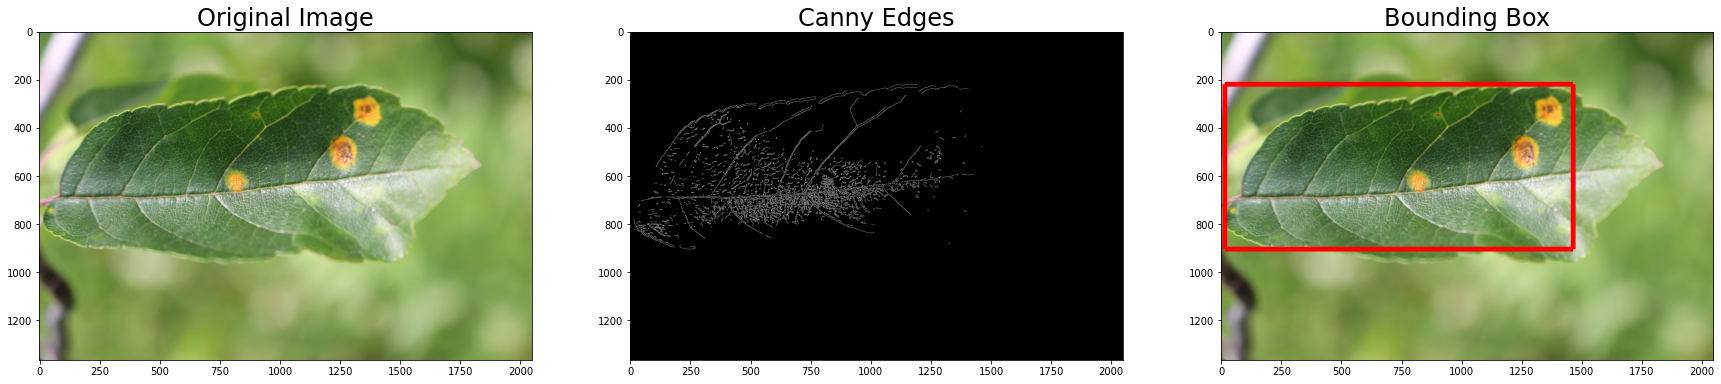

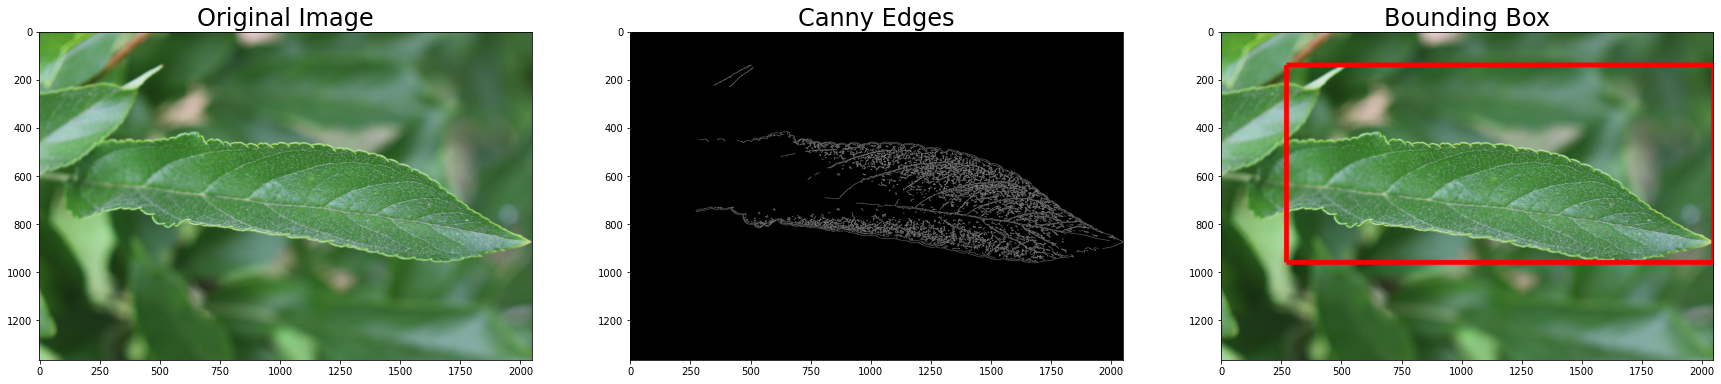

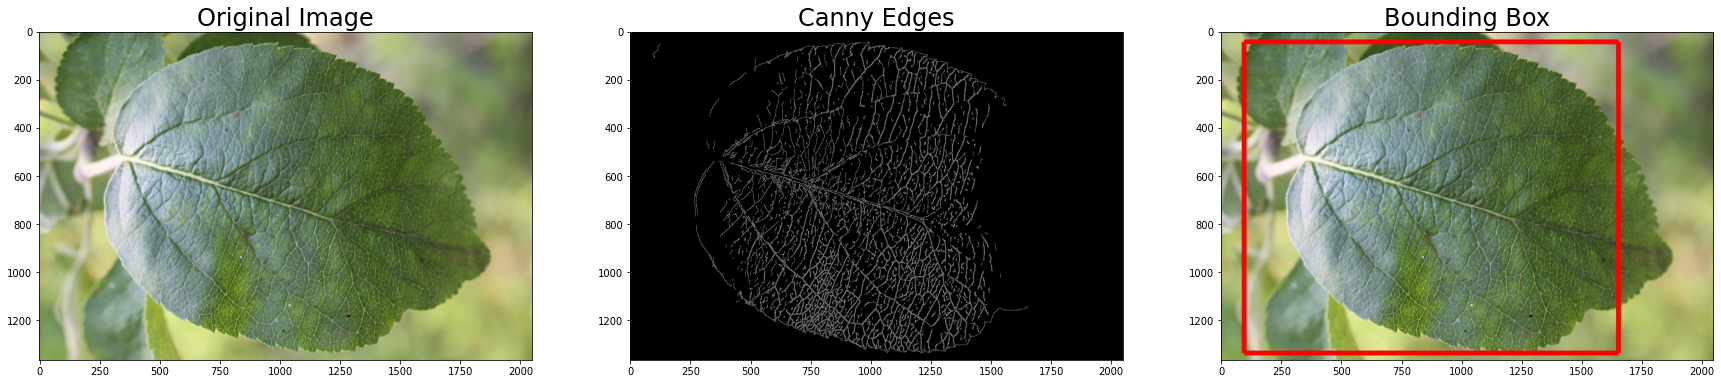

In [7]:
edge_and_cut(train_images[3])
edge_and_cut(train_images[4])
edge_and_cut(train_images[5])

In [31]:
def invert(img):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(cv2.flip(img, 0))
    ax[1].set_title('Vertical Flip', fontsize=24)
    ax[2].imshow(cv2.flip(img, 1))
    ax[2].set_title('Horizontal Flip', fontsize=24)
    plt.show()

In [ ]:
invert(train_images[3])
invert(train_images[4])
invert(train_images[5])

In [32]:
def conv(img):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
    kernel = np.ones((7, 7), np.float32)/25
    conv = cv2.filter2D(img, -1, kernel)
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(conv)
    ax[1].set_title('Convolved Image', fontsize=24)
    plt.show()

In [ ]:
conv(train_images[3])
conv(train_images[4])
conv(train_images[5])

In [10]:
def blur(img):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
    ax[0].imshow(img)
    ax[0].set_title("Original Image", fontsize = 24)
    ax[1].imshow(cv2.blur(img, (100, 100)))
    ax[1].set_title("Blurred Image", fontsize = 24)
    plt.show()

In [ ]:
blur(train_images[1])
blur(train_images[2])
blur(train_images[3])

## Modelling

In [30]:
AUTO = tf.data.experimental.AUTOTUNE
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

BATCH_SIZE = 16 * strategy.num_replicas_in_sync
GCS_DS_PATH = KaggleDatasets().get_gcs_path()

In [35]:
def format_path(st):
    return GCS_DS_PATH + '/images/' + st + '.jpg'

test_paths = test_data.image_id.apply(format_path).values
train_paths = train_data.image_id.apply(format_path).values


train_labels = np.float32(train_data.loc[:, 'healthy':'scab'].values)
train_paths, valid_paths, train_labels, valid_labels =\
train_test_split(train_paths, train_labels, test_size=0.15, random_state=2020)

In [36]:
def decode_image(filename, label=None, image_size=(512, 512)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, image_size)
    
    if label is None:
        return image
    else:
        return image, label

def data_augment(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if label is None:
        return image
    else:
        return image, label

### Create dataset objects

In [37]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_paths, train_labels))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(data_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((valid_paths, valid_labels))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(test_paths)
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
)


### Helper functions

In [38]:
def build_lrfn(lr_start=0.00001, lr_max=0.00005, 
               lr_min=0.00001, lr_rampup_epochs=5, 
               lr_sustain_epochs=0, lr_exp_decay=.8):
    lr_max = lr_max * strategy.num_replicas_in_sync

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn
            

### Define hypermeters and callbacks

In [39]:
lrfn = build_lrfn()
STEPS_PER_EPOCH = train_labels.shape[0] // BATCH_SIZE
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)

TypeError: 'PrefetchDataset' object does not support indexing

## DenseNet:

In [45]:
with strategy.scope():
    model = tf.keras.Sequential([DenseNet121(input_shape=(512, 512, 3),
                                             weights='imagenet',
                                             include_top=False),
                                 L.GlobalAveragePooling2D(),
                                 L.Dense(train_labels.shape[1],
                                         activation='softmax')])
        
    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 16, 16, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


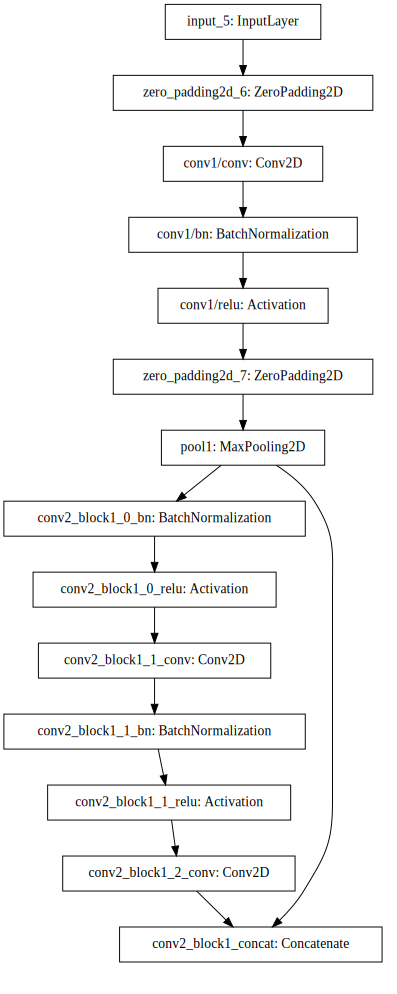

In [47]:
SVG(tf.keras.utils.model_to_dot(Model(model.layers[0].input, model.layers[0]
                                     .layers[13].output), dpi = 70).create(prog = 'dot', format = 'svg'))

# Train Model

In [46]:
valid_dataset

<PrefetchDataset shapes: ((None, 512, 512, 3), (None, 4)), types: (tf.float32, tf.float32)>

In [48]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    callbacks=[lr_schedule],
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data=valid_dataset)

Train for 12 steps, validate for 3 steps

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/20
12/12 [==============================] - 219s 18s/step - loss: 1.8634 - categorical_accuracy: 0.3333 - val_loss: 1.3036 - val_categorical_accuracy: 0.3175

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/20
12/12 [==============================] - 5s 375ms/step - loss: 1.0564 - categorical_accuracy: 0.6061 - val_loss: 0.8651 - val_categorical_accuracy: 0.6277

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/20
12/12 [==============================] - 24s 2s/step - loss: 0.3633 - categorical_accuracy: 0.8861 - val_loss: 0.6992 - val_categorical_accuracy: 0.6679

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/20
12/12 [==============================] - 32s 3s/step - loss: 0.2473 - categorical_accuracy: 0.9193 - val_loss: 1.2001 - val_categorical_accuracy: 0.5803

Epoch 00005: L

In [51]:
display_training_curves(
    history.history['categorical_accuracy'], 
    history.history['val_categorical_accuracy'], 
    'accuracy')

NameError: name 'display_training_curves' is not defined

In [52]:
probs_dnn = model.predict(test_dataset, verbose=1)
sub.loc[:, 'healthy':] = probs_dnn
sub.to_csv('submission_dnn.csv', index=False)
sub.head()

15/15 [==============================] - 116s 8s/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.003691,0.020589,0.975652,0.000068
1,Test_1,0.010124,0.042373,0.946394,0.001109
2,Test_2,0.000061,0.000121,0.000001,0.999817
3,Test_3,0.999984,0.000002,0.000013,0.000001
4,Test_4,0.000094,0.004670,0.995146,0.000090


## EfficientNet

In [56]:
with strategy.scope():
    model = tf.keras.Sequential([efn.EfficientNetB7(input_shape=(512, 512, 3),
                                                    weights='imagenet',
                                                    include_top=False),
                                 L.GlobalAveragePooling2D(),
                                 L.Dense(train_labels.shape[1],
                                         activation='softmax')])
    
    
        
    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Model)      (None, 16, 16, 2560)      64097680  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 2560)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 10244     
Total params: 64,107,924
Trainable params: 63,797,204
Non-trainable params: 310,720
_________________________________________________________________


In [57]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    callbacks=[lr_schedule],
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data=valid_dataset)

Train for 12 steps, validate for 3 steps

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/20
12/12 [==============================] - 331s 28s/step - loss: 1.3949 - categorical_accuracy: 0.2663 - val_loss: 1.2185 - val_categorical_accuracy: 0.3613

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/20
12/12 [==============================] - 12s 971ms/step - loss: 1.2008 - categorical_accuracy: 0.6035 - val_loss: 1.0971 - val_categorical_accuracy: 0.6095

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/20
12/12 [==============================] - 12s 979ms/step - loss: 0.6341 - categorical_accuracy: 0.8372 - val_loss: 0.7103 - val_categorical_accuracy: 0.7263

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/20
12/12 [==============================] - 12s 968ms/step - loss: 0.3136 - categorical_accuracy: 0.9004 - val_loss: 0.7349 - val_categorical_accuracy: 0.7883

Epoch 0

In [58]:
display_training_curves(
    history.history['categorical_accuracy'], 
    history.history['val_categorical_accuracy'], 
    'accuracy')

NameError: name 'display_training_curves' is not defined

In [ ]:
acc_df = pd.DataFrame(np.transpose([[*np.arange(1, EPOCHS+1).tolist()*3], ["Train"]*EPOCHS + ["Val"]*EPOCHS + ["Benchmark"]*EPOCHS,
                                     history.history['categorical_accuracy'] + history.history['val_categorical_accuracy'] + [1.0]*EPOCHS]))
acc_df.columns = ["Epochs", "Stage", "Accuracy"]
fig = px.bar(acc_df, x="Accuracy", y="Stage", animation_frame="Epochs", title="Accuracy vs. Epochs", color='Stage',
       color_discrete_map={"Train":"dodgerblue", "Val":"darkorange", "Benchmark":"seagreen"}, orientation="h")

fig.update_layout(
    xaxis = dict(
        autorange=False,
        range=[0, 1]
    )
)

fig.update_layout(template="plotly_white")

In [59]:
probs_efn = model.predict(test_dataset, verbose=1)
sub.loc[:, 'healthy':] = probs_efn
sub.to_csv('submission_efn.csv', index=False)
sub.head()

15/15 [==============================] - 60s 4s/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,2.458266e-04,3.050443e-04,0.999433,1.656919e-05
1,Test_1,6.217051e-07,1.195603e-05,0.999987,7.908645e-07
2,Test_2,3.269915e-05,2.102890e-05,0.000009,9.999369e-01
3,Test_3,9.999815e-01,2.181335e-08,0.000019,3.696020e-09
4,Test_4,1.043370e-05,1.776584e-04,0.999793,1.885187e-05


## EfficientNet Noisy Student

In [53]:
with strategy.scope():
    model = tf.keras.Sequential([efn.EfficientNetB7(input_shape=(512, 512, 3),
                                                    weights='noisy-student',
                                                    include_top=False),
                                 L.GlobalAveragePooling2D(),
                                 L.Dense(train_labels.shape[1],
                                         activation='softmax')])
    
    
        
    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    model.summary()

258072576/258068648 [==============================] - 8s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Model)      (None, 16, 16, 2560)      64097680  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 2560)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 10244     
Total params: 64,107,924
Trainable params: 63,797,204
Non-trainable params: 310,720
_________________________________________________________________


In [54]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    callbacks=[lr_schedule],
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data=valid_dataset)

Train for 12 steps, validate for 3 steps

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/20
12/12 [==============================] - 354s 29s/step - loss: 1.3786 - categorical_accuracy: 0.2988 - val_loss: 1.2041 - val_categorical_accuracy: 0.3358

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/20
12/12 [==============================] - 12s 970ms/step - loss: 1.2069 - categorical_accuracy: 0.5234 - val_loss: 1.1054 - val_categorical_accuracy: 0.6533

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/20
12/12 [==============================] - 12s 969ms/step - loss: 0.7681 - categorical_accuracy: 0.7682 - val_loss: 0.5814 - val_categorical_accuracy: 0.8248

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/20
12/12 [==============================] - 12s 972ms/step - loss: 0.3760 - categorical_accuracy: 0.8906 - val_loss: 0.3293 - val_categorical_accuracy: 0.8540

Epoch 0

In [55]:
probs_efnns = model.predict(test_dataset, verbose=1)
sub.loc[:, 'healthy':] = probs_efnns
sub.to_csv('submission_efnns.csv', index=False)
sub.head()

15/15 [==============================] - 65s 4s/step


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000093,5.945806e-04,9.993105e-01,0.000002
1,Test_1,0.000001,1.584434e-04,9.998385e-01,0.000002
2,Test_2,0.000809,2.509646e-05,7.593172e-07,0.999165
3,Test_3,0.999984,4.707948e-07,1.297937e-05,0.000002
4,Test_4,0.000097,1.504985e-03,9.983242e-01,0.000074


In [61]:
ensemble_1, ensemble_2, ensemble_3 = [sub]*3

ensemble_1.loc[:, 'healthy':] = 0.50*probs_dnn + 0.50*probs_efn
ensemble_2.loc[:, 'healthy':] = 0.25*probs_dnn + 0.75*probs_efn
ensemble_3.loc[:, 'healthy':] = 0.75*probs_dnn + 0.25*probs_efn

ensemble_1.to_csv('submission_ensemble_1.csv', index=False)
ensemble_2.to_csv('submission_ensemble_2.csv', index=False)
ensemble_3.to_csv('submission_ensemble_3.csv', index=False)